In [1]:
#!jt -t chesterish -f fira -fs 95 -T -N -tf fira -tfs 11 -nf fira -nfs 11
#!jt -t oceans16 -T -N

In [1]:
import pylab           as     pl
import pandas          as     pd
import numpy           as     np

from   matplotlib      import pyplot as plt
from   scipy           import stats
from   IPython.display import Image

In [3]:
%matplotlib inline

# *Hubble and the origins of DESI*

The year 1929 brough brought us the Oscars, the first car radio and Edwin Hubble's unexpected observation that every galaxy is separating from every other.

![title](edwin-hubble_rotatedjpg.jpg)

Let's take a quick look at what he saw.

In [4]:
dat = pd.read_csv('hubble.dat', sep='\s+', comment='#', names=['Galaxy name', 'Distance [Mpc]', 'Velocity [km/s]'])
dat

,Galaxy name,Distance [Mpc],Velocity [km/s]
0,S.Mag,0.032,170
1,L.Mag,0.034,290
2,NGC6822,0.214,-130
3,NGC598,0.263,-70
4,NGC221,0.275,-185
5,NGC224,0.275,-220
6,NGC5457,0.450,200
7,NGC4736,0.500,290
8,NGC5194,0.500,270
9,NGC4449,0.630,200


Hubble collected data for the distances of 24 galaxies from us, and their observed redshifts.  The redshift of a galaxy - how much redder the light is compared to if we saw the same light emitted by an atom in a lab - allows us to determine how fast the galaxy is moving.  You can find out more here https://en.wikipedia.org/wiki/Redshift

In [34]:
fig = plt.figure(figsize=(10, 7.5))
ax  = fig.add_subplot(1, 1, 1)
plt.close()

In [41]:
label_style = {'fontname': 'Georgia', 'fontsize': 16} 

In [42]:
ax.plot(dat['Distance [Mpc]'], dat['Velocity [km/s]'], '-', c='k', marker='*', lw=0)

ax.set_xlabel('Distance from us [Megaparsecs]', **label_style)
ax.set_ylabel('Recession velocity [km/s]', **label_style)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

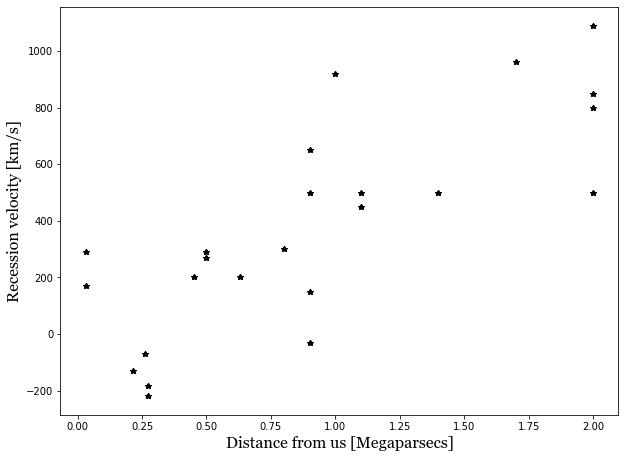

In [43]:
fig

Clearly there's some trend here, with what looks to be considerable noise on the measurements.  Let's figure out our best guess at the true relationship between the two.  We'll look at linear regression:

In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dat['Distance [Mpc]'],dat['Velocity [km/s]'])

In [53]:
print('The gradient to this trend is known as the Hubble constant:  {:.3f} [km/s/Mpc]'.format(slope))

The gradient to this trend is known as the Hubble constant:  454.158 [km/s/Mpc]


In [77]:
distances  = np.linspace(-0.5, 2.5, 10)
velocities = slope * distances

ax.plot(distances, velocities)
ax.set_xlim(0.0, 2.5)

(0.0, 2.5)

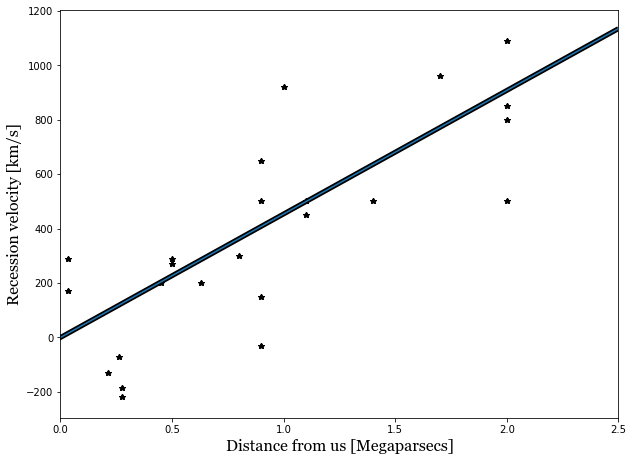

In [78]:
fig

# Dark Energy and DESI